<!-- ![PE](PE6.png) -->

# Positional Encodings

<center>
<img src="PE6.png" alt="drawing" width="400"/>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Absolute Positional Encodings

Absolute positional encoding assigns a unique label to each position in a
sequence **based on its distance from the beginning** of that sequence,
creating a global coordinate system relative to the sequence's start.

<center>

$PE_{(\mathrm{pos}, 2i)} = \mathrm{sin} (\frac{\mathrm{k}}{n^{{2i}/{d}}})$

$PE_{(\mathrm{pos}, 2i+1)} = \mathrm{cos} (\frac{\mathrm{k}}{n^{{2i}/{d}}})$

</center>

$\mathrm{k}$ : position of an object in the input sequence, $0 \leq k < L/2$

$n$ : user-defined scalar, set to 10,000 by the authors of [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

$d$ : dimension index

$i$ : used for mapping to column indices , with a single value of maps to both sine and cosine functions

<center>
<img src="PE3.png" alt="PE" width="400"/>
</center>

In [2]:
def abs_positional_encoding(length, dimensions):
  # 'length' is the length of sequences
  # 'dimensions' is the dimension of input embedding

  def single_pos_embed(position): #calculating for a certain position
      return [position / np.power(10000, 2 * (i // 2) / dimensions)
              for i in range(dimensions)]

  pos_enc = np.array([single_pos_embed(i) for i in range(length)]) #adding embedding for all positions
  pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  # dim 2i application
  pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  # dim 2i+1 application
  return pos_enc



In [3]:
abs_pe = abs_positional_encoding(length = 250,dimensions = 12)
print(f"shape of abs_pe : {abs_pe.shape}\n")
np.set_printoptions(precision=4)
print(abs_pe)

shape of abs_pe : (250, 12)

[[ 0.0000e+00  1.0000e+00  0.0000e+00 ...  1.0000e+00  0.0000e+00
   1.0000e+00]
 [ 8.4147e-01  5.4030e-01  2.1378e-01 ...  1.0000e+00  4.6416e-04
   1.0000e+00]
 [ 9.0930e-01 -4.1615e-01  4.1768e-01 ...  9.9999e-01  9.2832e-04
   1.0000e+00]
 ...
 [ 9.2681e-01 -3.7554e-01  1.9135e-01 ...  8.6172e-01  1.1440e-01
   9.9344e-01]
 [ 1.8475e-01 -9.8279e-01 -2.2903e-02 ...  8.6063e-01  1.1486e-01
   9.9338e-01]
 [-7.2716e-01 -6.8646e-01 -2.3610e-01 ...  8.5953e-01  1.1532e-01
   9.9333e-01]]


### Visualize the positional encoding using heatmap

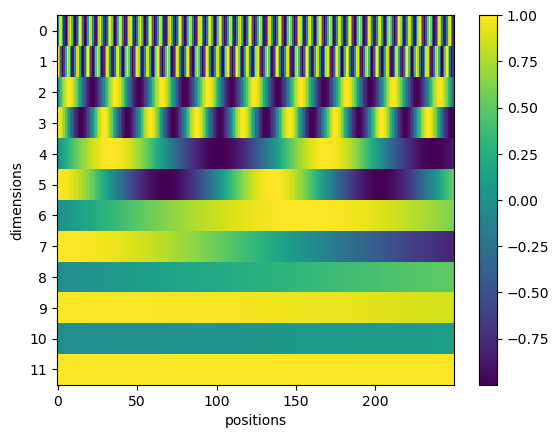

In [4]:
plt.imshow(abs_pe.T, interpolation='none', cmap='viridis', aspect='auto')
plt.xlabel('positions')
plt.ylabel('dimensions')
plt.yticks(range(0, 12, 1))
plt.colorbar()
plt.show()